# Multiple Linear Regression

In [1]:
import pandas as pd
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [2]:
df['sex'] = df['sex'].astype('category')
df['sex'] = df['sex'].cat.codes

In [3]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,southwest,16884.92
1,18,1,33.8,1,no,southeast,1725.55
2,28,1,33.0,3,no,southeast,4449.46
3,33,1,22.7,0,no,northwest,21984.47
4,32,1,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,no,northwest,10600.55
1334,18,0,31.9,0,no,northeast,2205.98
1335,18,0,36.9,0,no,southeast,1629.83
1336,21,0,25.8,0,no,southwest,2007.95


In [4]:
# smoker dan region juga
df['smoker'] = df['smoker'].astype('category')
df['smoker'] = df['smoker'].cat.codes

df['region'] = df['region'].astype('category')
df['region'] = df['region'].cat.codes

df

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,10600.55
1334,18,0,31.9,0,0,0,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.95


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [6]:
a = df.drop(columns = 'expenses')
a

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,3
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,1
4,32,1,28.9,0,0,1
...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1
1334,18,0,31.9,0,0,0
1335,18,0,36.9,0,0,2
1336,21,0,25.8,0,0,3


In [7]:
y = df['expenses']

y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split
a_train, a_test, y_train, y_test = train_test_split(a, y, test_size=0.3, random_state=0)

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [10]:
lr.fit(a_train, y_train)

LinearRegression()

In [11]:
c = lr.intercept_

In [12]:
c

np.float64(-11827.690243440882)

In [13]:
m = lr.coef_

In [14]:
m

array([  256.54688301,   -49.5556959 ,   329.03829593,   479.33098055,
       23399.22241438,  -276.24306229])

In [15]:
y_pred_train = lr.predict(a_train)

In [16]:
y_pred_train

array([ 2069.03359585,  8141.36511348, 18755.9087006 ,  7870.74055918,
        6319.77323677,  2023.31256548, 26863.42450343, 14926.51215619,
       10495.85929889, 16242.86056466, 11725.99370507, 11281.93339827,
       39310.00037015,  5826.58193988, 12319.08622599,  3157.93965299,
       15407.40958383,  4638.61198466,  5019.75698033,  6017.49314695,
       15364.9402173 ,  8973.68891998,  8767.32720772, 34224.46402602,
        6693.75646855, 26942.08473102, 27280.87272357, 15486.58742309,
        8811.58410991, 34400.26712291, 10167.16501979,  3890.92199565,
       15617.85872463, 29573.33802913, 29452.02427532, 28118.40509054,
       10015.30321546, 33055.63888237,  3963.91622151, 25447.54101793,
        5661.55997897, 27993.48459099,  7049.83736756, 15106.48019776,
        2569.47001823, 35456.58856451, 15254.19868735,  3190.8761776 ,
        1785.54434704, 10139.73090613,  9948.63660039, 11220.24742389,
       16775.5017179 ,  4325.19567694,  1904.54981552,  4172.84106372,
      

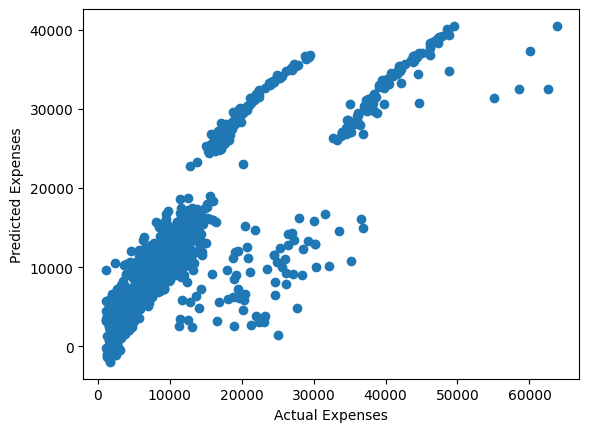

In [17]:
import matplotlib.pyplot as plt
plt.scatter(y_train, y_pred_train)
plt.xlabel('Actual Expenses')
plt.ylabel('Predicted Expenses')
plt.show()

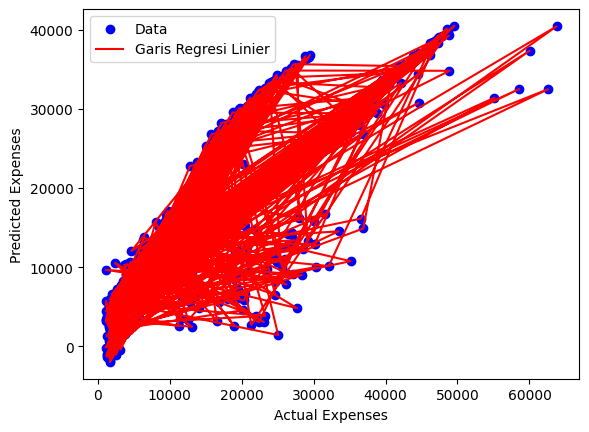

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot dari nilai aktual vs nilai prediksi
plt.scatter(y_train, y_pred_train, label='Data', color='blue')

# Prediksi nilai berdasarkan model regresi linear berganda untuk data training
y_pred_line = lr.predict(a_train)

# Tambahkan garis regresi linier (best-fit line)
plt.plot(y_train, y_pred_line, color='red', label='Garis Regresi Linier')

# Label sumbu
plt.xlabel('Actual Expenses')
plt.ylabel('Predicted Expenses')

# Tambahkan legenda
plt.legend()

# Tampilkan plot
plt.show()


In [19]:
from sklearn.metrics import r2_score

r2_score(y_train, y_pred_train)

0.7306860719626136

In [21]:
y_pred_test = lr.predict(a_test)

In [22]:
y_pred_test

array([11050.75030786,  9830.58401425, 37877.60057293, 16130.94142557,
        6935.55088408,  3886.76761583,  1443.86083359, 14394.94464116,
        9019.79772728,  7470.54831663,  4584.62434316, 10302.87615916,
        8692.67256789,  4081.50136233, 27550.09068791, 11164.04066927,
       11234.95457001,  5966.04861706,  8194.77658449, 26754.38982015,
       33448.43614635, 14342.84850626, 11680.03101722, 32224.0141746 ,
        4335.79376459,  9084.71373556,  1047.98500037, 10177.9556596 ,
        4029.06121061, 10385.45072068,  9039.33404941, 40108.56139118,
       15505.96388808, 13677.23187741, 24473.94242967,  5048.8847032 ,
       12899.34942003, 30332.88496471, 33308.28249653,  3431.49348423,
        3955.85963387,  4190.29599971, 30213.91592489, 39258.53153771,
       27778.4030602 ,  5001.76547535, 11032.4253509 ,  7754.51824821,
        3553.9859082 , 10619.24604637,  5556.3245936 ,  3388.61886944,
       32699.90093916, 38300.73692497, 16286.24744589,  6954.02246071,
      

In [23]:
r2_score(y_test, y_pred_test)

0.791151983192236

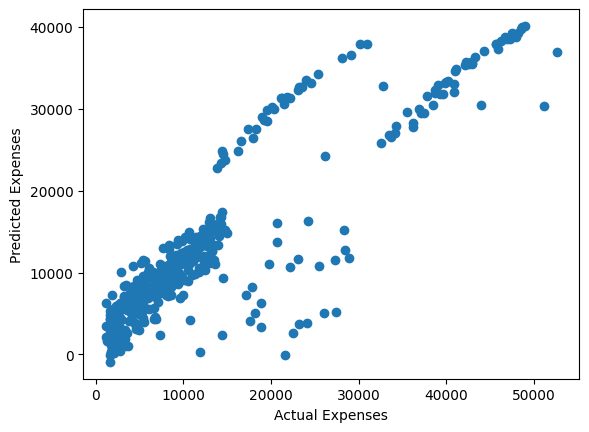

In [24]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Expenses')
plt.ylabel('Predicted Expenses')
plt.show()

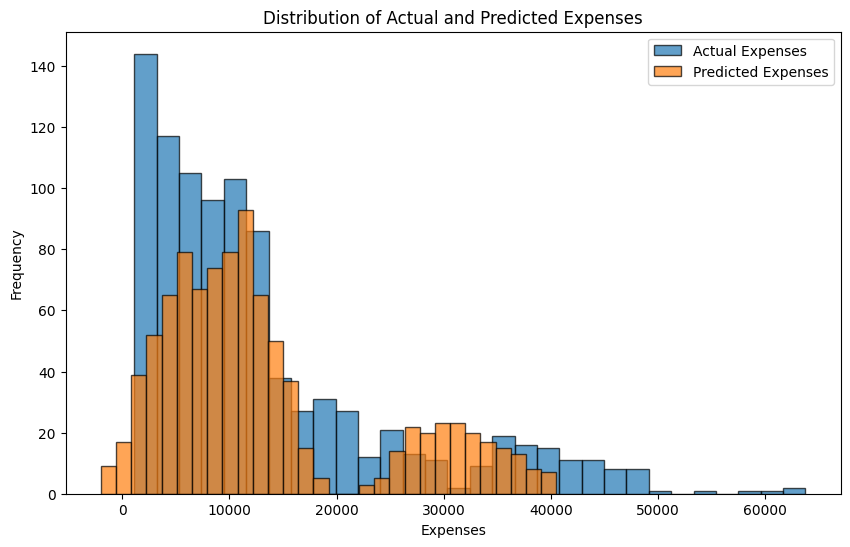

In [25]:
# Plot histogram dari kolom 'expenses' yang sebenarnya
plt.figure(figsize=(10, 6))

# Histogram untuk nilai aktual
plt.hist(y_train, bins=30, edgecolor='k', alpha=0.7, label='Actual Expenses')

# Histogram untuk nilai prediksi
plt.hist(y_pred_train, bins=30, edgecolor='k', alpha=0.7, label='Predicted Expenses')

# Label sumbu
plt.xlabel('Expenses')
plt.ylabel('Frequency')

# Judul plot
plt.title('Distribution of Actual and Predicted Expenses')

# Tempatkan legenda di kanan atas
plt.legend(loc='upper right')

# Tampilkan plot
plt.show()


# Simple Linear Regression

In [26]:
a = np.array(df['age']).reshape(-1,1)
b = np.array(df['expenses'])

print(a)
b

[[19]
 [18]
 [28]
 ...
 [18]
 [21]
 [61]]


array([16884.92,  1725.55,  4449.46, ...,  1629.83,  2007.95, 29141.36])

In [27]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.3, random_state=0)
model = LinearRegression()
model.fit(a_train, b_train)

LinearRegression()

In [28]:
b_pred_train = model.predict(a_train)

In [29]:
b_pred_train

array([ 8146.8876591 , 13121.31101446, 16200.71594873, 14305.69752764,
       11700.04719865,  8383.76496174,  8383.76496174, 18332.61167246,
       13595.06561974, 18569.4889751 , 15016.32943555, 16674.47055401,
       18806.36627773,  9094.39686965, 14542.57483028,  8857.51956701,
       17858.85706719,  8857.51956701, 12884.43371183,  8146.8876591 ,
       17621.97976455, 12647.55640919, 17385.10246191, 15253.20673819,
       12410.67910655,  9094.39686965, 11700.04719865, 17385.10246191,
       14779.45213292,  9094.39686965, 15253.20673819, 10752.5379881 ,
       15726.96134346, 14068.82022501, 10752.5379881 , 10752.5379881 ,
       15726.96134346, 13358.1883171 ,  9805.02877756,  8620.64226438,
        9805.02877756,  8383.76496174, 10515.66068547, 16200.71594873,
        8146.8876591 , 15726.96134346, 14779.45213292,  9805.02877756,
        9094.39686965, 15016.32943555, 15253.20673819, 14542.57483028,
       17385.10246191, 11226.29259337,  9094.39686965,  8620.64226438,
      

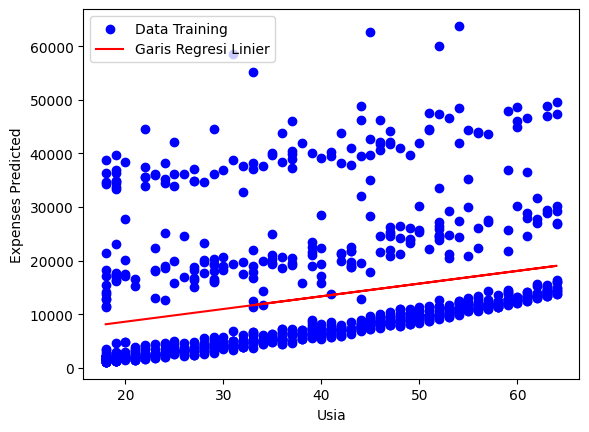

Mean Squared Error (MSE): 129980518.84211215
R-squared (R²): 0.07806233215766101


In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Assuming `model` is already defined and trained
# Assuming `a_train` and `b_train` are the training data and labels

# Predict the training data
b_pred_train = model.predict(a_train)

# Scatter plot dari data training
plt.scatter(a_train, b_train, color='blue', label='Data Training')

# Plot garis regresi linier berdasarkan prediksi model
plt.plot(a_train, b_pred_train, color='red', label='Garis Regresi Linier')

# Label sumbu
plt.xlabel('Usia')
plt.ylabel('Expenses Predicted')

# Tampilkan legenda
plt.legend()

# Tampilkan plot
plt.show()

# Evaluasi model
mse = mean_squared_error(b_train, b_pred_train)
r2 = r2_score(b_train, b_pred_train)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


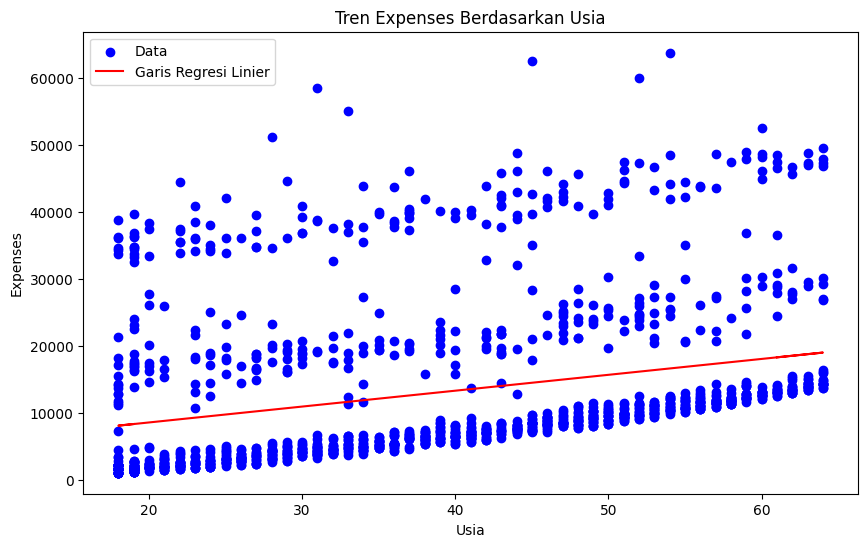

In [31]:
import matplotlib.pyplot as plt

# Plot tren expense berdasarkan usia
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['expenses'], color='blue', label='Data')
plt.plot(a, model.predict(a), color='red', label='Garis Regresi Linier')
plt.xlabel('Usia')
plt.ylabel('Expenses')
plt.title('Tren Expenses Berdasarkan Usia')
plt.legend()
plt.show()

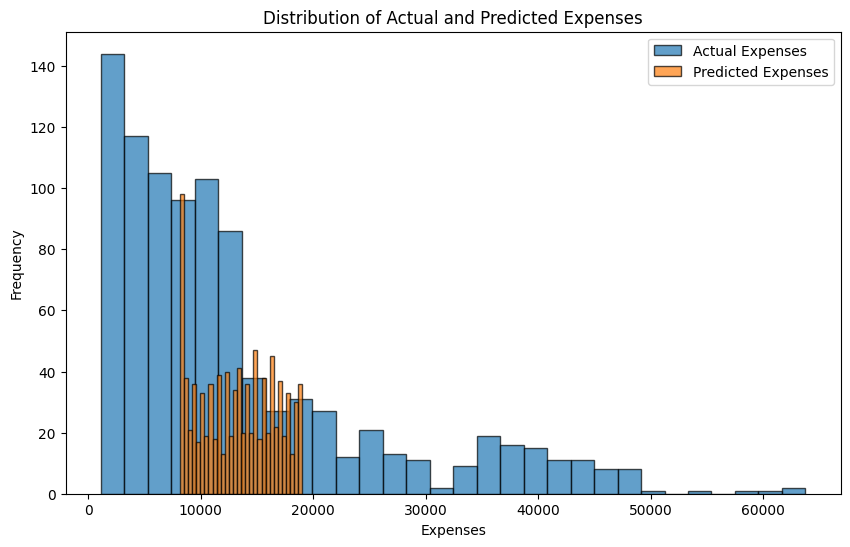

In [32]:
# Plot histogram dari kolom 'expenses' yang sebenarnya
plt.figure(figsize=(10, 6))

# Histogram untuk nilai aktual
plt.hist(b_train, bins=30, edgecolor='k', alpha=0.7, label='Actual Expenses')

# Histogram untuk nilai prediksi
plt.hist(b_pred_train, bins=30, edgecolor='k', alpha=0.7, label='Predicted Expenses')

# Label sumbu
plt.xlabel('Expenses')
plt.ylabel('Frequency')

# Judul plot
plt.title('Distribution of Actual and Predicted Expenses')

# Tempatkan legenda di kanan atas
plt.legend(loc='upper right')

# Tampilkan plot
plt.show()
